# -------------------Loan Lending Case Study --------------------------------

## 1. Import Libraries

In [58]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import warnings
warnings.filterwarnings('ignore')

## 2. Read Data into Pandas Dataframe

In [59]:
# read loan.csv file from 
loan=pd.read_csv("loan.csv")


### 2.1 Analyse Data structure

In [60]:

## taking some insights of records
loan.head()
loan.shape
loan.info(verbose=True)
loan.describe()
#loan.loan_status.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### 2.2 Use For loop to see all unique values

In [4]:
#Get Unique values from all columns to see which columns has just one or useless values
for col in loan:
    print(col) 
    print(loan[col].unique())

id
[1077501 1077430 1077175 ...   90395   90376   87023]
member_id
[1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050

 'https://lendingclub.com/browse/loanDetail.action?loan_id=87023']
desc
['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ...
 'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.'
 'The rate of interest and fees incurred by carrying a balance on my credit card are so out

[ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]
total_rec_int
[ 863.16  435.17  605.67 ... 1413.49  174.2  1695.26]
total_rec_late_fee
[ 0.         16.97       15.00000003 ...  1.69        1.36
 19.89      ]
recoveries
[  0.   117.08 189.06 ... 304.2   35.7   21.29]
collection_recovery_fee
[0.0000e+00 1.1100e+00 2.0900e+00 ... 6.6836e+02 4.4425e+02 2.3000e-01]
last_pymnt_d
['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec-11' 'Nov-11'
 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11' 'Apr-11' 'Mar-11'
 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-

In [5]:
#loan_redord_anyls.info(verbose=True, show_counts=True)
#Remove columns that have 90% null values
drop_columns=loan.columns[(loan.isnull().sum()/len(loan.index))>.9]
loan_redord_anyls_1=loan.drop(drop_columns,axis=1)
print(loan_redord_anyls_1.isnull().sum())
#loan_redord_anyls_1.info()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### 2.3 Remove Columns where only one unique value is present
#### Policy_code, Application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens,out_prncp_inv, ut_prncp,initial_list_status , pymnt_plan

#### Above columns have only one value in all rows so those columns can also be eliminated from dataframe

In [6]:
loan_redord_anyls_2 = loan_redord_anyls_1.drop(['last_pymnt_d','collections_12_mths_ex_med','pub_rec_bankruptcies','url','mths_since_last_delinq','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','out_prncp_inv', 'out_prncp','initial_list_status'], axis=1)

In [61]:
## comparing shapes of records after removing Current loan status records

print(loan_redord_anyls_2.shape)

(38577, 41)


### 2.3 Impute column values

In [8]:
loan_redord_anyls_2["title"].fillna("Not Available", inplace = True)

loan_redord_anyls_2["emp_title"].fillna("Not Available", inplace = True)

loan_redord_anyls_2["desc"].fillna("Not Available", inplace = True)

#### 2.5 Filter out records which are not requiredJust considering the Fully paid and Charged off rows for analysis since from current loans we wont be able to derive the objective

In [9]:
## filtering out records which are Fully Paid or Charged Off as we cant say anything about loan which are currently running

loan_redord_anyls_2=loan_redord_anyls_2[(loan_redord_anyls_2.loan_status=='Fully Paid')|(loan_redord_anyls_2.loan_status=='Charged Off')]



In [10]:
## remove records that have more than 5 columns missing

pd.set_option('display.max_columns', None)

loan_redord_anyls_3=loan_redord_anyls_2[~(loan_redord_anyls_2.isnull().sum(axis=1)>5)]

In [63]:
loan_redord_anyls_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null int64
int_rate                   38577 non-null float64
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  38577 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
pymnt_plan                 38577 non-null object
desc      

In [64]:
## change data type of column term,

#loan_redord_anyls_3['term'].head()

loan_redord_anyls_3['term']=loan_redord_anyls_3['term'].apply(lambda x:int(str(x).replace(' months','')))

loan_redord_anyls_3['int_rate']=loan_redord_anyls_3['int_rate'].apply(lambda x: x if type(x)==int else float(str(x).replace('%','')))

loan_redord_anyls_3['revol_util']=loan_redord_anyls_3['revol_util'].apply(lambda x: x if type(x)==int else float(str(x).replace('%','')))

## clean employee length 

#emp_length

loan_redord_anyls4=loan_redord_anyls_3[~(loan_redord_anyls_3['emp_length'].isnull())]

loan_redord_anyls4['emp_length']=loan_redord_anyls4['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])

loan_redord_anyls4['emp_length']=loan_redord_anyls4['emp_length'].apply(lambda x:pd.to_numeric(x))

loan_redord_anyls4["emp_length"].fillna(int(loan_redord_anyls4['emp_length'].mean()), inplace=True)

loan_redord_anyls4['issue_d_month']=pd.to_datetime(loan_redord_anyls4['issue_d'],format='%b-%y').dt.month

loan_redord_anyls4['issue_d_year']=pd.to_datetime(loan_redord_anyls4['issue_d'],format='%b-%y').dt.year

loan_redord_anyls4["revol_util"].fillna(int(loan_redord_anyls4['revol_util'].mean()), inplace=True)

loan_redord_anyls4=loan_redord_anyls4[~(loan_redord_anyls4['last_credit_pull_d'].isnull())]



#### Final Data set with Clean data

In [13]:
print(loan_redord_anyls4.isnull().sum())

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

In [14]:
##bucketing columns

#for loan_amnt max=35000 and min=500 , annual_inc min=4000.0 max=6000000.0 int_rate max= 24.4 and min=5.42



def loan_amnt_bucket(x):

    if(x<5000):

        return '0-5k'

    elif(x>=5000 & x<10000):

        return '5k-10k'

    elif(x>=10000 & x<15000):

        return '10k-15k'

    elif(x>=15000 & x<20000):

        return '15k-20k'

    elif(x>=20000 & x<25000):

        return '20k-25k'

    elif(x>=25000 & x<30000):

        return '25k-30k'

    elif(x>=25000 & x<30000):

        return '25k-30k'

    elif(x>=30000 & x<35000):

        return '30k-35k'

    elif(x>=35000):

        return '35k+'

 

def annual_inc_bucket(x):

    if(x<20000):

        return '0-20k'

    elif(x>=20000 and x<40000):

        return '20k-40k'

    elif(x>=40000 and x<60000):

        return '40k-60k'

    elif(x>=60000 and x<80000):

        return '60k-80k'

    elif(x>80000 and x<100000):

        return '80k-100k'

    elif(x>=100000):

        return '100k+'

def int_rate_bucket(x):

    if(x<5):

        return '0-5'

    if(x>=5 and x<10):

        return '5-10'

    if(x>=10 and x<15):

        return '10-15'

    if(x>=15 and x<20):

        return '15-20'

    if(x>=20 and x<25):

        return '20-25'

    

    



In [16]:
loan_redord_anyls4['loan_amnt_bucket']= loan_redord_anyls4['loan_amnt'].apply(lambda x:loan_amnt_bucket(x))   

loan_redord_anyls4['annual_inc_bucket']=loan_redord_anyls4['annual_inc'].apply(lambda x:annual_inc_bucket(x))

loan_redord_anyls4['int_rate_bucket']=loan_redord_anyls4['int_rate'].apply(lambda x:int_rate_bucket(x))



In [17]:
## check percentage of loan Charged Off

print(loan_redord_anyls4['loan_status'].value_counts()*100/len(loan_redord_anyls4['loan_status']))



Fully Paid     85.621437
Charged Off    14.378563
Name: loan_status, dtype: float64


In [65]:
# Add numerical flag for Charged off and full paid values

loan_redord_anyls4["loan_status_flag"] = loan_redord_anyls4 .loan_status.apply(lambda x : 1 if x=='Fully Paid' else 0)



## 3. Correlation matrix on logical numerical columns

AttributeError: 'AxesSubplot' object has no attribute 'show'

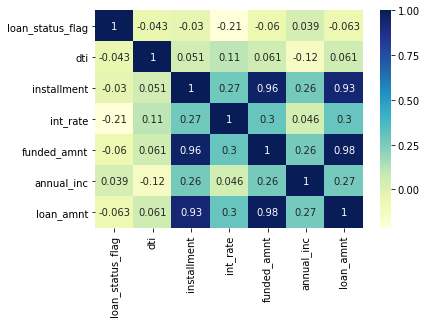

In [66]:
# include few relevant columns into new dataframe based on business accument to check correlation with charged off loans
Corr_test = loan_redord_anyls4[['loan_status_flag','dti','installment','int_rate','funded_amnt','annual_inc','loan_amnt']]
Corr_test.corr()
dataplot = sns.heatmap(Corr_test.corr(), cmap="YlGnBu", annot=True)
#displaying heatmap

dataplot.show()



 ####  Observation : Univariate analysis can be started with int_rate as it shows relatively strong negative correlation

## 4. Univariate Analysis

count    37542.000000
mean        11.963470
std          3.683023
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
80%         15.230000
90%         16.820000
95%         18.390000
max         24.400000
Name: int_rate, dtype: float64


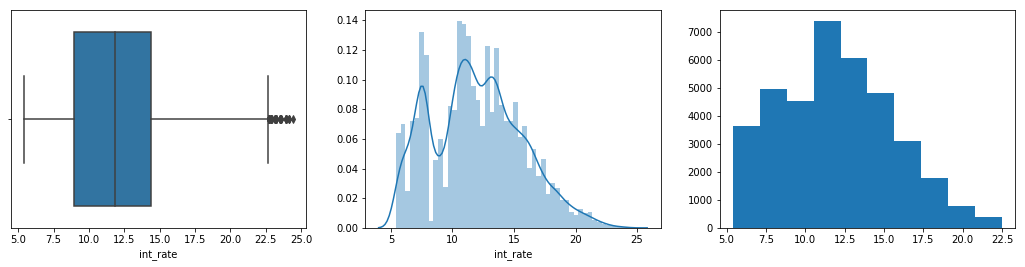

In [73]:
## UNIVARIATE ANALYSIS for int_rate

print(loan_redord_anyls4['int_rate'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))

## 95 % data is below

#plt.boxplot(loan_redord_anyls4['loan_amnt'])

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)

sns.boxplot(loan_redord_anyls4['int_rate'])

plt.subplot(1,3,2)

sns.distplot(loan_redord_anyls4['int_rate'])

plt.subplot(1,3,3)

plt.hist(int_rate['int_rate'])

plt.show()

#### Observation : Median Int rate is 12% while most loans are provided between 8% to 15%

count    37477.000000
mean        11.943904
std          3.656049
min          5.420000
25%          8.940000
50%         11.830000
75%         14.380000
80%         15.210000
90%         16.770000
95%         18.300000
max         22.480000
Name: int_rate, dtype: float64


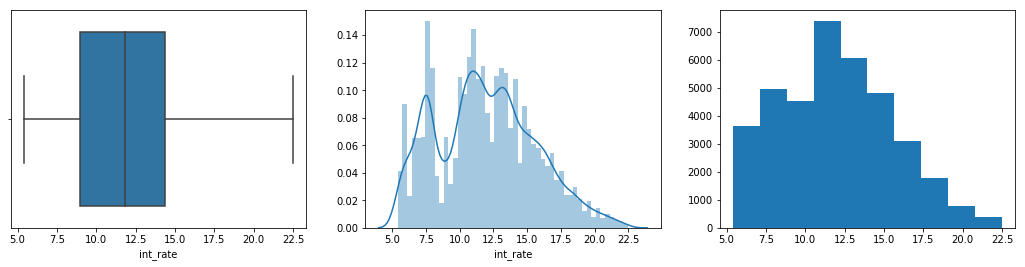

In [25]:

## UNIVARIATE ANALYSIS for int_rate

int_rate= loan_redord_anyls4[loan_redord_anyls4['int_rate'] <= 22.5]

print(int_rate['int_rate'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))

## 95 % data is below

#plt.boxplot(loan_redord_anyls4['loan_amnt'])

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)

sns.boxplot(int_rate['int_rate'])

plt.subplot(1,3,2)

sns.distplot(int_rate['int_rate'])

plt.subplot(1,3,3)

plt.hist(int_rate['int_rate'])

#loan_redord_anyls_5=loan_redord_anyls5[(loan_redord_anyls5.loan_status=='Charged Off')]

plt.show()



count    5368.000000
mean       13.830659
std         3.582414
min         5.420000
25%        11.360000
50%        13.610000
75%        16.400000
80%        16.890000
90%        18.640000
95%        19.910000
max        22.480000
Name: int_rate, dtype: float64


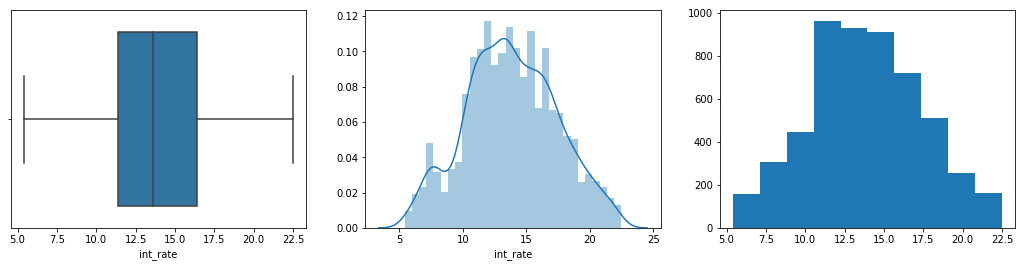

In [26]:
## UNIVARIATE ANALYSIS for int_rate
int_rate_Charged_off= int_rate[int_rate['loan_status'] == 'Charged Off']
print(int_rate_Charged_off['int_rate'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(int_rate_Charged_off['int_rate'])
plt.subplot(1,3,2)
sns.distplot(int_rate_Charged_off['int_rate'])
plt.subplot(1,3,3)
plt.hist(int_rate_Charged_off['int_rate'])
#loan_redord_anyls_5=loan_redord_anyls5[(loan_redord_anyls5.loan_status=='Charged Off')]
plt.show()


count    37542.000000
mean     11119.762533
std       7354.041563
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
80%      16000.000000
90%      21847.500000
95%      25000.000000
98%      30000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


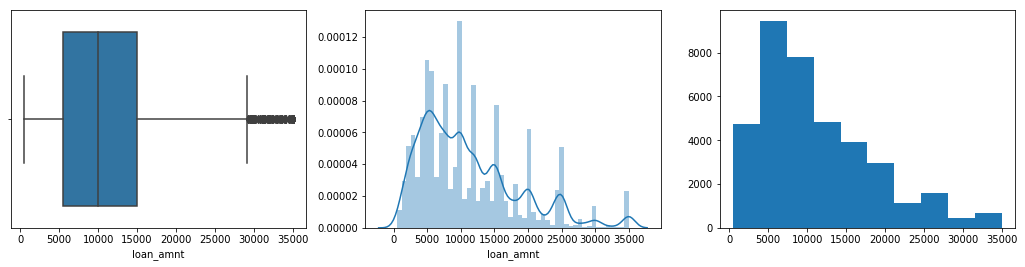

In [27]:
## UNIVARIATE ANALYSIS for loan amount
## observation 90 % data is below 25000.000000 and most of loan_amount is between 5k to 15k

print(loan_redord_anyls4['loan_amnt'].describe(percentiles=[.25,.50,.75,.80,.90,.95,.98]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(loan_redord_anyls4['loan_amnt'])
plt.subplot(1,3,2)
sns.distplot(loan_redord_anyls4['loan_amnt'])
plt.subplot(1,3,3)
plt.hist(loan_redord_anyls4['loan_amnt'])
plt.show()

count    3.754200e+04
mean     6.940502e+04
std      6.467803e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
80%      9.000000e+04
90%      1.166576e+05
95%      1.420000e+05
98%      1.899960e+05
max      6.000000e+06
Name: annual_inc, dtype: float64


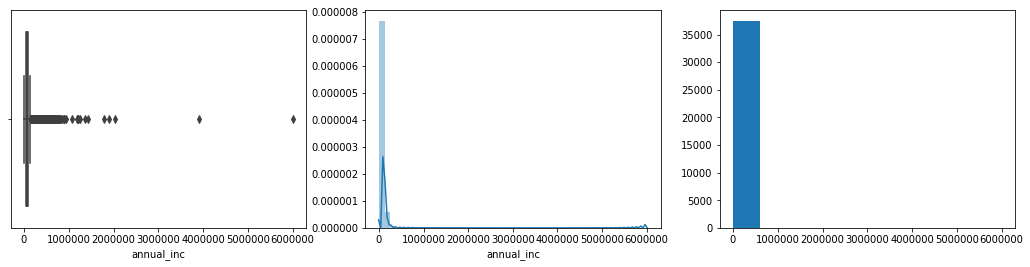

In [74]:
## UNIVARIATE ANALYSIS for loan amount
## observation 90 % data is below 25000.000000 and most of loan_amount is between 5k to 15k

print(loan_redord_anyls4['annual_inc'].describe(percentiles=[.25,.50,.75,.80,.90,.95,.98]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(loan_redord_anyls4['annual_inc'])
plt.subplot(1,3,2)
sns.distplot(loan_redord_anyls4['annual_inc'])
plt.subplot(1,3,3)
plt.hist(loan_redord_anyls4['annual_inc'])
plt.show()

#### Annual Income has outliers . need to be reomved for further analysis

count     35466.000000
mean      60995.872028
std       27191.961158
min        4000.000000
25%       40000.000000
50%       56400.000000
75%       78000.000000
80%       84000.000000
90%      100000.000000
95%      115000.000000
98%      125000.000000
max      139992.000000
Name: annual_inc, dtype: float64


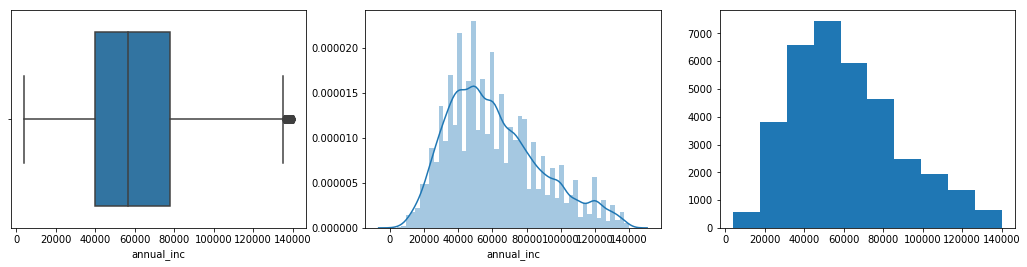

In [75]:
## UNIVARIATE ANALYSIS for loan amount
## observation 90 % data is below 25000.000000 and most of loan_amount is between 5k to 15k
Annuac_inc = loan_redord_anyls4[loan_redord_anyls4['annual_inc'] <140000 ]
print(Annuac_inc['annual_inc'].describe(percentiles=[.25,.50,.75,.80,.90,.95,.98]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(Annuac_inc['annual_inc'])
plt.subplot(1,3,2)
sns.distplot(Annuac_inc['annual_inc'])
plt.subplot(1,3,3)
plt.hist(Annuac_inc['annual_inc'])
plt.show()

#### Observation : Most loans are gived to customers having 40000 to 80000 annual income

In [67]:
univariate(df=loan,col='int_rate',vartype=0)

NameError: name 'univariate' is not defined

## 5. Bivariate Anlaysis

In [42]:
crosstab = pd.crosstab(Annuac_inc['int_rate_bucket'], Annuac_inc['loan_status'],margins=True)
#print(crosstab)
crosstab['Default Rate']  = 100* crosstab['Charged Off']/ crosstab['All']

print(crosstab)

loan_status      Charged Off  Fully Paid    All  Default Rate
int_rate_bucket                                              
10-15                   2545       14623  17168     14.824091
15-20                   1651        4931   6582     25.083561
20-25                    261         397    658     39.665653
5-10                     717       10341  11058      6.483993
All                     5174       30292  35466     14.588620


In [71]:
check_int_rate = loan_redord_anyls4[loan_redord_anyls4['funded_amnt'] <35000 ]
check_int_rate = check_int_rate[check_int_rate['installment'] <500 ]
check_int_rate = check_int_rate[check_int_rate['int_rate'] <12.5 ]

crosstab = pd.crosstab(check_int_rate['purpose'], check_int_rate['loan_status'],margins=True)
#print(crosstab)
crosstab['Default Rate']  = 100* crosstab['Charged Off']/ crosstab['All']

print(crosstab)

loan_status         Charged Off  Fully Paid    All  Default Rate
purpose                                                         
car                          82         918   1000      8.200000
credit_card                 179        2402   2581      6.935296
debt_consolidation          743        6957   7700      9.649351
educational                  21         156    177     11.864407
home_improvement            121        1423   1544      7.836788
house                         9         154    163      5.521472
major_purchase               84        1208   1292      6.501548
medical                      38         336    374     10.160428
moving                       46         274    320     14.375000
other                       217        1803   2020     10.742574
renewable_energy             10          47     57     17.543860
small_business              125         531    656     19.054878
vacation                     30         197    227     13.215859
wedding                  

#### Observation :Home , car, credit card, wedding loans are safest while small business is high risk even at low interest rate

In [70]:
check_int_rate = loan_redord_anyls4[loan_redord_anyls4['funded_amnt'] <35000 ]
check_int_rate = check_int_rate[check_int_rate['installment'] <500 ]
check_int_rate = check_int_rate[check_int_rate['int_rate'] <12.5 ]

crosstab = pd.crosstab(check_int_rate['emp_length'], check_int_rate['loan_status'],margins=True)
#print(crosstab)
crosstab['Default Rate']  = 100* crosstab['Charged Off']/ crosstab['All']

print(crosstab)

loan_status  Charged Off  Fully Paid    All  Default Rate
emp_length                                               
1                    393        3512   3905     10.064020
2                    190        1991   2181      8.711600
3                    165        1841   2006      8.225324
4                    150        1464   1614      9.293680
5                    147        1439   1586      9.268600
6                     94         978   1072      8.768657
7                     86         741    827     10.399033
8                     71         650    721      9.847434
9                     50         561    611      8.183306
10                   390        3671   4061      9.603546
All                 1736       16848  18584      9.341369


#### Observation : As such no conclusion can be drawn on the employment length

In [69]:
check_int_rate = loan_redord_anyls4[loan_redord_anyls4['funded_amnt'] > 0 ]
check_int_rate = check_int_rate[check_int_rate['installment'] < 900 ]
check_int_rate = check_int_rate[check_int_rate['int_rate'] > 16 ]

crosstab = pd.crosstab(check_int_rate['purpose'], check_int_rate['loan_status'],margins=True)
#print(crosstab)
crosstab['Default Rate']  = 100* crosstab['Charged Off']/ crosstab['All']

print(crosstab.sort_values('Default Rate', ascending = False))

loan_status         Charged Off  Fully Paid   All  Default Rate
purpose                                                        
small_business              141         211   352     40.056818
educational                   5           8    13     38.461538
house                        22          40    62     35.483871
other                       133         281   414     32.125604
debt_consolidation          827        1983  2810     29.430605
All                        1443        3591  5034     28.665077
medical                      22          56    78     28.205128
car                          27          74   101     26.732673
vacation                      8          25    33     24.242424
wedding                      23          77   100     23.000000
major_purchase               40         134   174     22.988506
moving                       13          45    58     22.413793
credit_card                 118         414   532     22.180451
home_improvement             62         

#### Observation : Small business , education , house loans are high risk if interest rate is high

In [68]:
check_int_rate = loan_redord_anyls4[loan_redord_anyls4['funded_amnt'] > 0 ]
check_int_rate = check_int_rate[check_int_rate['installment'] < 1000 ]
#check_int_rate = check_int_rate[check_int_rate['int_rate'] > 16 ]

crosstab = pd.crosstab(check_int_rate['grade'], check_int_rate['loan_status'],margins=True)
#print(crosstab)
crosstab['Default Rate']  = 100* crosstab['Charged Off']/ crosstab['All']

print(crosstab.sort_values('Default Rate', ascending = False))

loan_status  Charged Off  Fully Paid    All  Default Rate
grade                                                    
G                     98         198    296     33.108108
F                    312         643    955     32.670157
E                    696        1895   2591     26.862215
D                   1078        3839   4917     21.923937
C                   1284        6348   7632     16.823899
All                 5374       31937  37311     14.403259
B                   1349        9957  11306     11.931718
A                    557        9057   9614      5.793634


#### Observation : Grades A, B and C are relatively safe to give loans while D, E F G are riskiest